# **Predicción de Precios de Vehículos Usados (Core)**

#  1. Carga y Exploración de Datos:

* Descargar y cargar el dataset.
* Realizar una exploración inicial para entender la estructura del dataset.
* Identificar valores faltantes, duplicados y outliers.

**Descargar y cargar el dataset.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import kagglehub

In [2]:
path = kagglehub.dataset_download("austinreese/craigslist-carstrucks-data")
print("Path to dataset files:", path)
df = pd.read_csv(path + "/vehicles.csv")

100%|██████████| 262M/262M [00:06<00:00, 44.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/austinreese/craigslist-carstrucks-data/versions/10


**Realizar una exploración inicial para entender la estructura del dataset.**

In [3]:
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
# Copiar el DataFrame a uno nuevo de limpieza
df_limpio = df.copy()

**Identificar valores faltantes, duplicados y outliers.**

In [6]:
# Tipos de variable
numeric_cols = df_limpio.select_dtypes(include=['float64', 'int64']).columns
categoric_cols = df_limpio.select_dtypes(include=['object', 'category']).columns

Porcentaje de valores faltantes en cada columna:
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64


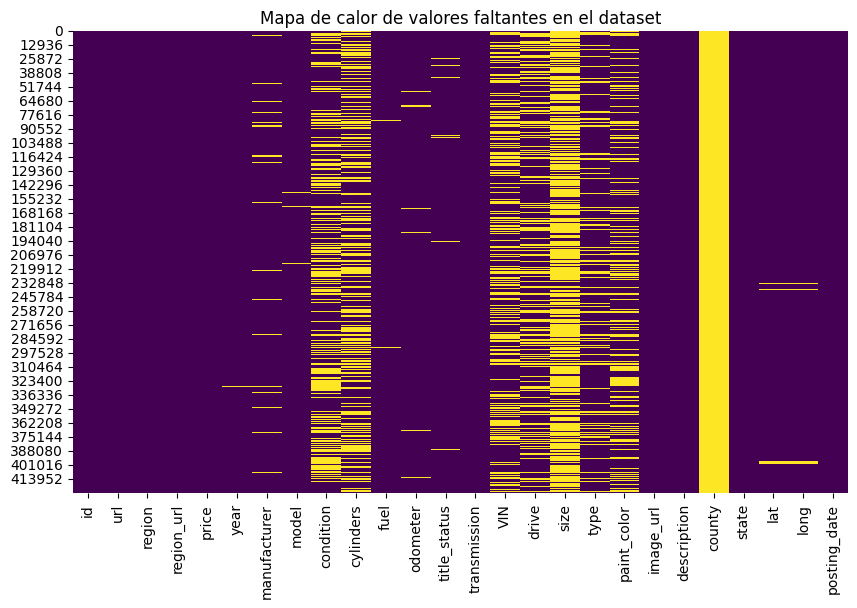

In [7]:
# Verificación de valores faltantes
missing_data = df_limpio.isnull().mean() * 100
missing_data = missing_data[missing_data > 0]
print("Porcentaje de valores faltantes en cada columna:")
print(missing_data)

# Visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df_limpio.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de calor de valores faltantes en el dataset")
plt.show()

In [8]:
# Variables numericas
df_limpio[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        426880 non-null  int64  
 1   price     426880 non-null  int64  
 2   year      425675 non-null  float64
 3   odometer  422480 non-null  float64
 4   county    0 non-null       float64
 5   lat       420331 non-null  float64
 6   long      420331 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 22.8 MB


In [9]:
# Variables Categoricas
def value_unique(str_col):
    return len(df_limpio[str_col].unique().tolist())/df_limpio.shape[0]

for col in categoric_cols:
    unique_ratio = value_unique(col)
    print(f"Columna '{col}': proporción de valores únicos = {unique_ratio:.2f}")

Columna 'url': proporción de valores únicos = 1.00
Columna 'region': proporción de valores únicos = 0.00
Columna 'region_url': proporción de valores únicos = 0.00
Columna 'manufacturer': proporción de valores únicos = 0.00
Columna 'model': proporción de valores únicos = 0.07
Columna 'condition': proporción de valores únicos = 0.00
Columna 'cylinders': proporción de valores únicos = 0.00
Columna 'fuel': proporción de valores únicos = 0.00
Columna 'title_status': proporción de valores únicos = 0.00
Columna 'transmission': proporción de valores únicos = 0.00
Columna 'VIN': proporción de valores únicos = 0.28
Columna 'drive': proporción de valores únicos = 0.00
Columna 'size': proporción de valores únicos = 0.00
Columna 'type': proporción de valores únicos = 0.00
Columna 'paint_color': proporción de valores únicos = 0.00
Columna 'image_url': proporción de valores únicos = 0.57
Columna 'description': proporción de valores únicos = 0.85
Columna 'state': proporción de valores únicos = 0.00
Co

In [10]:
# Eliminar las columnas menos representativas y que no contiene datos
df_limpio = df_limpio.drop(['id', 'url', 'region', 'manufacturer', 'model', 'region_url' ,'county', 'image_url', 'VIN', 'description', 'state', 'posting_date'], axis=1)

In [11]:
# Tipos de variable con la nueva distribución
numerical = df_limpio.select_dtypes(include=['float64', 'int64']).columns
categorical = df_limpio.select_dtypes(include=['object', 'category']).columns

# Modelo 1: Variables Numericas

In [12]:
# DataFrame con los valores numéricos
numeric_df = df_limpio[numerical]
print(numeric_df.columns.tolist())

['price', 'year', 'odometer', 'lat', 'long']


Porcentaje de valores faltantes en cada columna:
year        0.282281
odometer    1.030735
lat         1.534155
long        1.534155
dtype: float64


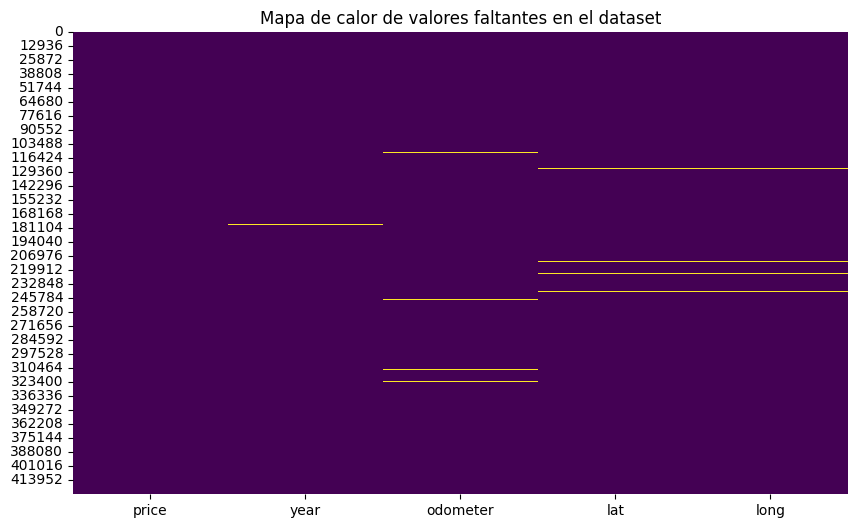

In [13]:
# Verificación de valores faltantes
missing_data = numeric_df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0]
print("Porcentaje de valores faltantes en cada columna:")
print(missing_data)

# Visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de calor de valores faltantes en el dataset")
plt.show()

In [14]:
# Aplicar la media a los valores faltantes
for col in numerical:
  df_limpio[col] = numeric_df[col].fillna(numeric_df[col].median())

In [15]:
# Descriccione del Df resultante
numeric_df.describe()

,price,year,odometer,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


             price      year  odometer       lat      long
price     1.000000 -0.004925  0.010032  0.000357 -0.000408
year     -0.004925  1.000000 -0.157215 -0.014677 -0.001410
odometer  0.010032 -0.157215  1.000000 -0.001459  0.009807
lat       0.000357 -0.014677 -0.001459  1.000000 -0.128088
long     -0.000408 -0.001410  0.009807 -0.128088  1.000000


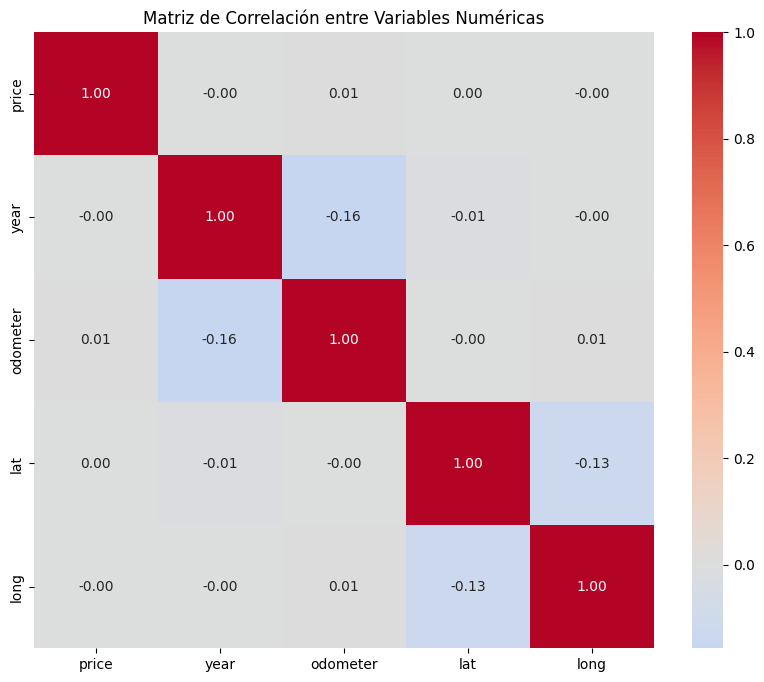

In [16]:
# Correlación de los datos numéricos
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

# Modelo 2: Variables Categoricos

In [17]:
# DataFrame con los valores categoricas
category_df = df_limpio[categorical]
print(category_df.columns.tolist())

['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']


Porcentaje de valores faltantes en cada columna:
condition       40.785232
cylinders       41.622470
fuel             0.705819
title_status     1.930753
transmission     0.598763
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
dtype: float64


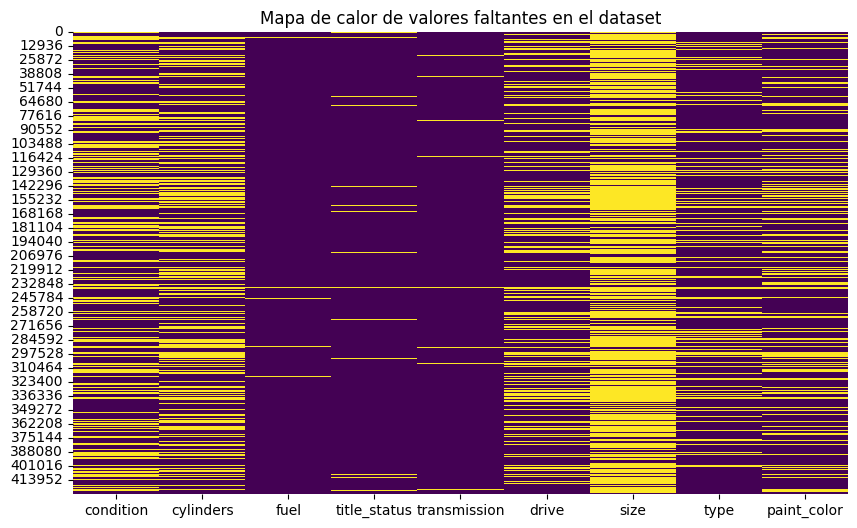

In [18]:
# Verificación de valores faltantes
missing_data = category_df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0]
print("Porcentaje de valores faltantes en cada columna:")
print(missing_data)

# Visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(category_df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de calor de valores faltantes en el dataset")
plt.show()

In [19]:
# Aplicar la imputación 'unknown' a los valores faltantes
for col in categorical:
  df_limpio[col] = category_df[col].fillna('unknown')

Porcentaje de valores faltantes en cada columna:
Series([], dtype: float64)


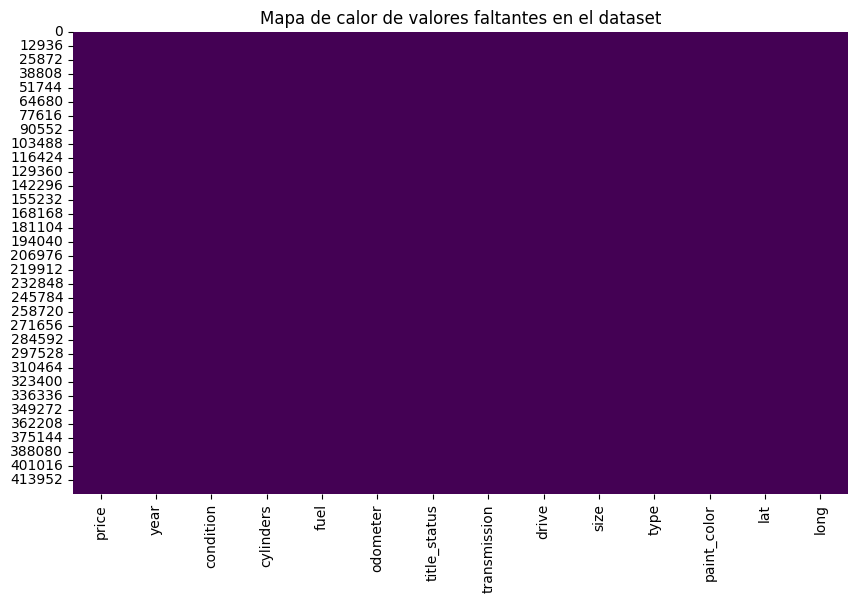

In [20]:
# Verificación de valores faltantes
missing_data = df_limpio.isnull().mean() * 100
missing_data = missing_data[missing_data > 0]
print("Porcentaje de valores faltantes en cada columna:")
print(missing_data)

# Visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df_limpio.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de calor de valores faltantes en el dataset")
plt.show()

**Datos duplicados y precio "cero"**

In [21]:
# ver detalle de los datos duplicardos
df_limpio[df_limpio.duplicated()]

,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
11,0,2013.0,unknown,unknown,unknown,85548.0,unknown,unknown,unknown,unknown,unknown,unknown,39.150100,-88.432600
12,0,2013.0,unknown,unknown,unknown,85548.0,unknown,unknown,unknown,unknown,unknown,unknown,39.150100,-88.432600
13,0,2013.0,unknown,unknown,unknown,85548.0,unknown,unknown,unknown,unknown,unknown,unknown,39.150100,-88.432600
14,0,2013.0,unknown,unknown,unknown,85548.0,unknown,unknown,unknown,unknown,unknown,unknown,39.150100,-88.432600
20,24999,2013.0,unknown,unknown,unknown,85548.0,unknown,unknown,unknown,unknown,unknown,unknown,39.150100,-88.432600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426870,22990,2020.0,good,unknown,gas,3066.0,clean,other,fwd,unknown,sedan,blue,33.786500,-84.445400
426874,33590,2018.0,good,6 cylinders,gas,30814.0,clean,automatic,rwd,unknown,sedan,white,33.779214,-84.411811
426875,23590,2019.0,good,6 cylinders,gas,32226.0,clean,other,fwd,unknown,sedan,unknown,33.786500,-84.445400
426876,30590,2020.0,good,unknown,gas,12029.0,clean,other,fwd,unknown,sedan,red,33.786500,-84.445400


In [22]:
# Eliminar datos duplicados
df_limpio = df_limpio.drop_duplicates()

In [23]:
# Contar cuantos precios de autos estan en cero
df_limpio[df_limpio['price'] == 0].shape[0]

17785

In [24]:
# eliminar los registros que el precio este en cero
df_limpio = df_limpio[df_limpio['price'] != 0]

In [25]:
#Información de los datos limpios
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286759 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         286759 non-null  int64  
 1   year          286759 non-null  float64
 2   condition     286759 non-null  object 
 3   cylinders     286759 non-null  object 
 4   fuel          286759 non-null  object 
 5   odometer      286759 non-null  float64
 6   title_status  286759 non-null  object 
 7   transmission  286759 non-null  object 
 8   drive         286759 non-null  object 
 9   size          286759 non-null  object 
 10  type          286759 non-null  object 
 11  paint_color   286759 non-null  object 
 12  lat           286759 non-null  float64
 13  long          286759 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 32.8+ MB


**Datos outliers**

In [26]:
# Función para identificar outliers usando IQR
def identify_outliers_iqr(df_limpio, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df_limpio[col].quantile(0.25)
        Q3 = df_limpio[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definición de límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificación de outliers
        outliers = df_limpio[(df_limpio[col] < lower_bound) | (df_limpio[col] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())

    return set(outlier_indices)

# Identificando outliers en las variables numéricas
outlier_indices = identify_outliers_iqr(df_limpio, numerical)
num_outliers = len(outlier_indices)
num_data = len(df)

print(f"Número total de outliers identificados: {num_outliers}")
print(f"Porcentaje de outliers: {(num_outliers / num_data) * 100:.2f}%")

Número total de outliers identificados: 22425
Porcentaje de outliers: 5.25%


In [27]:
# Filtrar el DataFrame sin outliers
df_limpio = df_limpio.drop(index=outlier_indices)

In [28]:
# Convertir columnas categoricas a tipo 'category'
df_limpio[categorical] = df_limpio[categorical].astype('category')

In [29]:
# Información de los datos limpios
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264334 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   price         264334 non-null  int64   
 1   year          264334 non-null  float64 
 2   condition     264334 non-null  category
 3   cylinders     264334 non-null  category
 4   fuel          264334 non-null  category
 5   odometer      264334 non-null  float64 
 6   title_status  264334 non-null  category
 7   transmission  264334 non-null  category
 8   drive         264334 non-null  category
 9   size          264334 non-null  category
 10  type          264334 non-null  category
 11  paint_color   264334 non-null  category
 12  lat           264334 non-null  float64 
 13  long          264334 non-null  float64 
dtypes: category(9), float64(4), int64(1)
memory usage: 14.4 MB


#  2. Limpieza y Preprocesamiento:

* Manejar valores faltantes.
* Eliminar duplicados.
* Corregir inconsistencias en los datos categóricos.
* Escalar las características numéricas.
* Realizar transformaciones necesarias para las características categóricas.

**Valores faltantes y datos duplicados ya fue tratado más arriba**

**- Transformación de variables categóricas.**

In [30]:
from sklearn.preprocessing import OneHotEncoder

# Instancia del codificador OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Codificar y transformar las variables categóricas
encoded_data = encoder.fit_transform(df_limpio[categorical])

# Crear un DataFrame con las variables codificadas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical))

# Reiniciar el índice de encoded_df para que coincida con df_limpio
encoded_df.index = df_limpio.index

# Crear un DataFrame combinado con las columnas numéricas y las columnas codificadas
df_transf = pd.concat([df_limpio.select_dtypes(include=['float64', 'int64']), encoded_df], axis=1)

# Resultado: el DataFrame `df_transf` contiene solo las columnas numéricas y las variables codificadas
df_transf

,price,year,odometer,lat,long,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow
0,6000,2013.0,85548.0,39.150100,-88.432600,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,11900,2013.0,85548.0,39.150100,-88.432600,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,21000,2013.0,85548.0,39.150100,-88.432600,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1500,2013.0,85548.0,39.150100,-88.432600,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4900,2013.0,85548.0,39.150100,-88.432600,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426871,17990,2018.0,34239.0,33.786500,-84.445400,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
426872,32590,2020.0,19059.0,33.779214,-84.411811,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
426873,30990,2018.0,15080.0,33.779214,-84.411811,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
426878,28990,2018.0,30112.0,33.786500,-84.445400,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**- División del conjunto de datos en entrenamiento y prueba.**

In [31]:
from sklearn.model_selection import train_test_split

# DataFrame para valores numericos
df_transf_v1 = df_transf.copy()

# Separar las características (X) y la variable objetivo (y)
X = df_transf_v1.drop(['price'], axis=1)
y = df_transf_v1['price']

# Dividir los datos en conjunto de entrenamiento (80%) y de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**- Escalado de características.**

In [32]:
from sklearn.preprocessing import StandardScaler
# Escalado de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  3. Exploración de Datos:

* Implementar al menos dos modelos de regresión (Linear Regression y Random Forest Regressor).
* Evaluar los modelos utilizando MSE, RMSE, y R^2.
* Seleccionar el mejor modelo basado en las métricas de evaluación.

**Regresión Lineal**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo
lin_reg  = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicciones
y_pred_lin = lin_reg.predict(X_test)

# Evaluación
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Linear Regression - MSE: {mse_lin:.2f} RMSE: {rmse_lin:.2f} R^2: {r2_lin:.2f}")

Linear Regression - MSE: 54706679.91 RMSE: 7396.40 R^2: 0.65


**Bosques Aleatorios**

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el modelo
# rf_reg = RandomForestRegressor(random_state=42)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_reg.predict(X_test)

# Evaluación
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - MSE: {mse_rf:.2f} RMSE: {rmse_rf:.2f} R^2: {r2_rf:.2f}")

Random Forest Regressor - MSE: 25379647.09 RMSE: 5037.82 R^2: 0.84


**Comparacion de modelos**

In [40]:
# Comparar los modelos según las métricas de evaluación
results = {
    "Linear Regression": {
        "MSE": mse_lin,
        "RMSE": rmse_lin,
        "R²": r2_lin
    },
    "Random Forest Regressor": {
        "MSE": mse_rf,
        "RMSE": rmse_rf,
        "R²": r2_rf
    }
}

# Seleccionar el modelo con el mejor desempeño según MSE
best_model_mse = min(results, key=lambda model: results[model]["MSE"])
best_mse_value = results[best_model_mse]["MSE"]
print(f"El mejor modelo basado en el MSE es: {best_model_mse} con MSE: {best_mse_value:.2f}")

# Seleccionar el modelo con el mejor desempeño según RMSE
best_model_rmse = min(results, key=lambda model: results[model]["RMSE"])
best_rmse_value = results[best_model_rmse]["RMSE"]
print(f"El mejor modelo basado en el RMSE es: {best_model_rmse} con RMSE: {best_rmse_value:.2f}")

# Seleccionar el modelo con el mejor desempeño según R²
best_model_r2 = max(results, key=lambda model: results[model]["R²"])
best_r2_value_r2 = results[best_model_r2]["R²"]
print(f"El mejor modelo basado en el R² es: {best_model_r2} con R²: {best_r2_value_r2:.2f}")

El mejor modelo basado en el MSE es: Random Forest Regressor con MSE: 25379647.09
El mejor modelo basado en el RMSE es: Random Forest Regressor con RMSE: 5037.82
El mejor modelo basado en el R² es: Random Forest Regressor con R²: 0.84


# 5. Optimización del Modelo:

* Optimizar el modelo seleccionado utilizando GridSearchCV.

**Optimización con GridSearchCV para Linear Regression**

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Definir el modelo
model_lin = LinearRegression()

# Corregir el grid de hiperparámetros de Linear Regression
param_grid_lin = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# GridSearchCV para Linear Regression (corregido)
grid_search_lin = GridSearchCV(estimator=model_lin, param_grid=param_grid_lin, scoring='neg_mean_squared_error', cv=5)
grid_search_lin.fit(X_train, y_train)

# Mejor modelo y mejores parámetros
best_model_lin = grid_search_lin.best_estimator_
print("Mejores parámetros para Linear Regression:", grid_search_lin.best_params_)

# Entrenar el mejor modelo obtenido de GridSearchCV
best_model_lin.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_lin = best_model_lin.predict(X_test)

# Evaluar el modelo con métricas
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse_best_lin = mean_squared_error(y_test, y_pred_lin)
rmse_best_lin = np.sqrt(mse_best_lin)
r2_best_lin = r2_score(y_test, y_pred_lin)

# Mostrar los resultados
print(f"Mejor modelo - Linear Regression: MSE: {mse_best_lin:.2f}, RMSE: {rmse_best_lin:.2f}, R^2: {r2_best_lin:.2f}")


Mejores parámetros para Linear Regression: {'copy_X': True, 'fit_intercept': True}
Mejor modelo - Linear Regression: MSE: 54706679.91, RMSE: 7396.40, R^2: 0.65


**Optimización con RandomizedSearchCV para Random Forest Regressor**

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definir el modelo
model_rf = RandomForestRegressor(random_state=42)

# Redefinir el grid de hiperparámetros con menos combinaciones
param_grid_rf = {
    'n_estimators': [50, 100],  # Menos valores para optimizar
    'max_depth': [None, 10],     # Menos profundidades
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# RandomizedSearchCV para Random Forest
random_search_rf = RandomizedSearchCV(estimator=model_rf,
                                      param_distributions=param_grid_rf,
                                      scoring='neg_mean_squared_error',
                                      cv=3,
                                      n_iter=5,  # Reducir el número de iteraciones
                                      n_jobs=2,  # Limitar el uso de núcleos
                                      random_state=42,
                                      verbose=2)  # Para obtener más detalles durante el ajuste
random_search_rf.fit(X_train, y_train)

# Mejor modelo y mejores parámetros
best_model_rf = random_search_rf.best_estimator_
print("Mejores parámetros para Random Forest Regressor:", random_search_rf.best_params_)

# Entrenar el mejor modelo obtenido de RandomizedSearchCV
best_model_rf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = best_model_rf.predict(X_test)

# Evaluar el modelo con métricas
mse_best_rf = mean_squared_error(y_test, y_pred_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
r2_best_rf = r2_score(y_test, y_pred_rf)

# Mostrar los resultados
print(f"Mejor modelo - Random Forest Regressor: MSE={mse_best_rf:.2f}, RMSE={rmse_best_rf:.2f}, R^2={r2_best_rf:.2f}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Mejores parámetros para Random Forest Regressor: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Mejor modelo - Random Forest Regressor: MSE=25379647.09, RMSE=5037.82, R^2=0.84


#  6. Documentación y Entrega:

* Documentar todo el proceso en un archivo .ipynb claramente comentado.
* Crear visualizaciones con interpretaciones.
* Subir el archivo a un repositorio en GitHub con un tag de liberación.



> En cada tramo del código realizo un breve comentario de lo que estoy haciendo para entender todo el código.



**Gráfico de Errores Residuales**

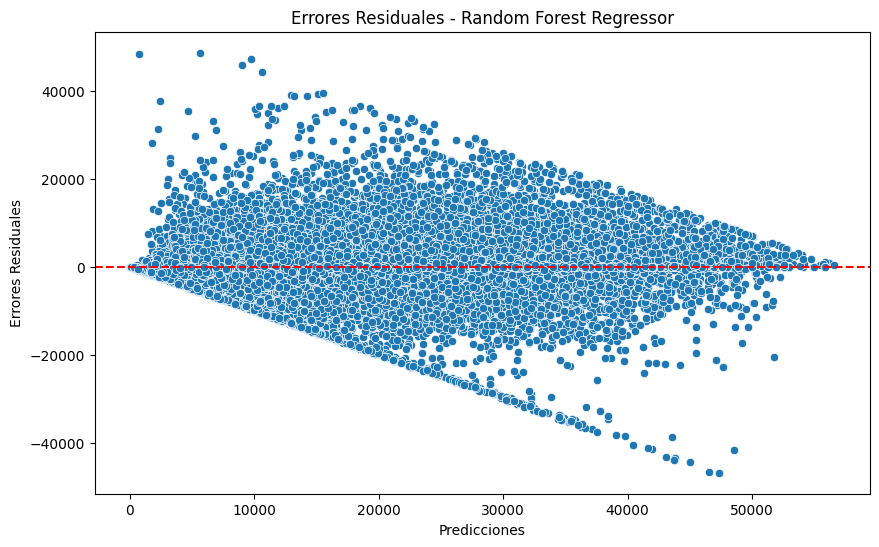

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular los errores residuales
residuals = y_test - y_pred_rf

# Gráfico de Errores Residuales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Errores Residuales - Random Forest Regressor')
plt.xlabel('Predicciones')
plt.ylabel('Errores Residuales')
plt.show()

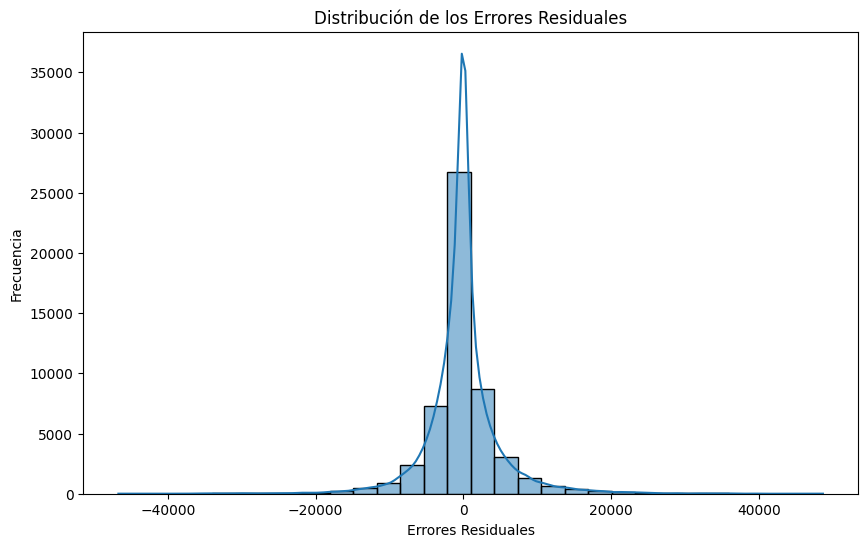

In [44]:
# Histograma de errores residuales
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribución de los Errores Residuales')
plt.xlabel('Errores Residuales')
plt.ylabel('Frecuencia')
plt.show()

**Gráfico de Predicciones vs. Valores Reales**

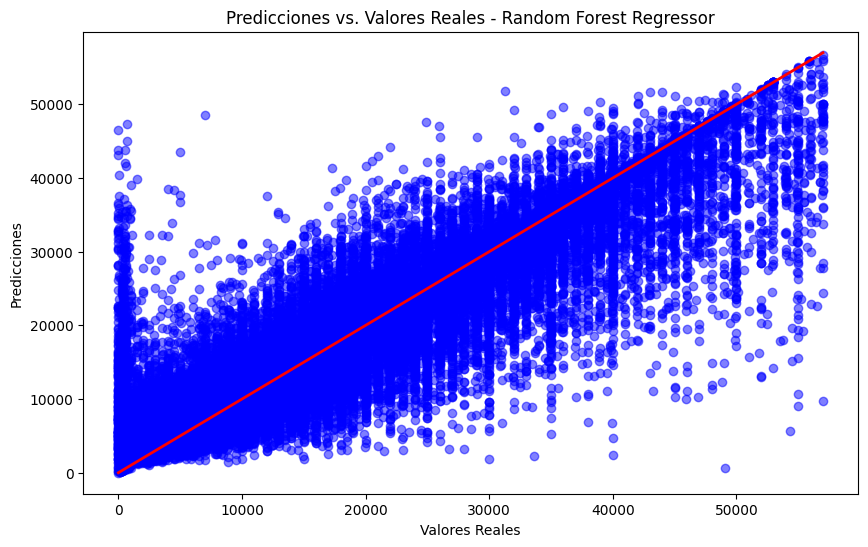

In [41]:
# Gráfico de Predicciones vs. Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Predicciones vs. Valores Reales - Random Forest Regressor')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()